<a href="https://colab.research.google.com/github/sp-moribito/pythonbasic/blob/main/py210621.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

a=tf.constant(2)
print(tf.rank(a))

tf.Tensor(0, shape=(), dtype=int32)


In [2]:
def square_pos(x):
  if x>0:
    x=x*x
  else:
    x=x*1
  return x

print(square_pos(tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)


In [3]:
x=tf.random.uniform((10,5))
w=tf.random.uniform((5,3))
d=tf.matmul(x,w)

print(f'x와 w의 벡터 내적의 결과 크기:{d.shape}')

x와 w의 벡터 내적의 결과 크기:(10, 3)


In [6]:
from tensorflow.keras.datasets.mnist import load_data

(x_train,y_train),(x_test,y_test)=load_data(path='mist.npz')

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
print(x_train.shape,y_train.shape)
print(y_train)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]


In [10]:
print(x_test.shape,y_test.shape)
print(y_test)

(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


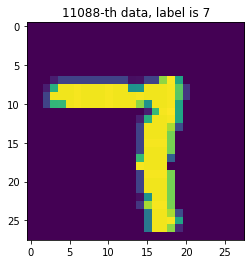

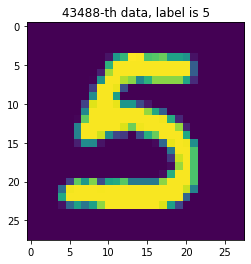

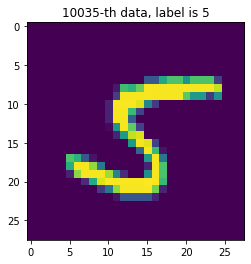

In [11]:
import matplotlib.pyplot as plt
import numpy as np

sample_size=3

random_idx=np.random.randint(60000,size=sample_size)

for idx in random_idx:
  img=x_train[idx,:]
  label=y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title("%d-th data, label is %d" % (idx,label))

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=777)

print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


In [13]:
num_x_train=x_train.shape[0]
num_x_val=x_val.shape[0]
num_x_test=x_test.shape[0]

x_train=(x_train.reshape((num_x_train,28*28)))/255
x_val=(x_val.reshape((num_x_val,28*28)))/255
x_test=(x_test.reshape((num_x_test,28*28)))/255

print(x_train.shape)

(42000, 784)


In [14]:
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

model.add(Dense(64,activation='relu',input_shape=(784,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
def softmax(arr):
  m=np.max(arr)
  arr=arr-m
  arr=np.exp(arr)
  return arr/np.sum(arr)

def sigmoid(x):
  return 1/(1+np.exp(-x))

case_1=np.array([3.1,3.0,2.9])
case_2=np.array([2.0,1.0,0.7])

np.set_printoptions(precision=3)
print(f'sigmoid {sigmoid(case_1)},softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)},softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948],softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668],softmax [0.61  0.224 0.166]


In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [19]:
history=model.fit(x_train,y_train,epochs=30,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 2s 4ms/step - loss: 0.4914 - acc: 0.8593 - val_loss: 0.2416 - val_acc: 0.9312
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.2009 - acc: 0.9417 - val_loss: 0.1834 - val_acc: 0.9456
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1540 - acc: 0.9551 - val_loss: 0.1515 - val_acc: 0.9563
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1238 - acc: 0.9645 - val_loss: 0.1449 - val_acc: 0.9563
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1061 - acc: 0.9680 - val_loss: 0.1263 - val_acc: 0.9619
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0921 - acc: 0.9727 - val_loss: 0.1202 - val_acc: 0.9640
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0796 - acc: 0.9768 - val_loss: 0.1164 - val_acc: 0.9654
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

In [20]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [21]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1482 - acc: 0.9694


[0.1482222080230713, 0.9693999886512756]

In [22]:
results=model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7)
print(f'각 클래스에 속할 확률 : \n{results [0]}')

(10000, 10)
각 클래스에 속할 확률 : 
[2.3062668e-11 1.2099073e-15 2.1762805e-09 4.2266947e-07 7.5321657e-17
 3.1817424e-10 4.0887540e-16 9.9999952e-01 2.4852279e-10 1.6995124e-08]


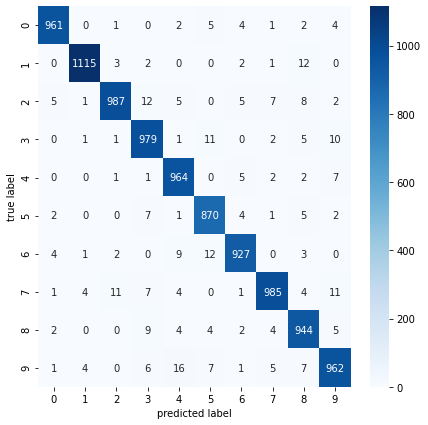

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,7))
cm=confusion_matrix(np.argmax(y_test,axis=-1),np.argmax(results,axis=-1))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [24]:
print('\n',classification_report(np.argmax(y_test,axis=-1),np.argmax(results,axis=-1)))


               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.96      0.98      0.97       892
           6       0.97      0.97      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

